In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# initiating data
boston_data = load_boston()

In [3]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston_data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
boston_data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
# Configuring DataFrame
boston_df = pd.DataFrame(data=np.c_[boston_data.data, boston_data.target], columns=boston_data.feature_names.tolist()+ ['TARGET'])
print("Shape: ",boston_df.shape)
boston_df.head()

Shape:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [57]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
#Although, no empty value as per description provided.. but still.
boston_df.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TARGET     False
dtype: bool

<AxesSubplot:xlabel='LSTAT', ylabel='TARGET'>

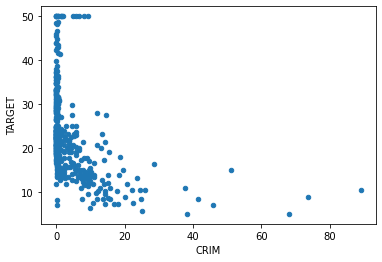

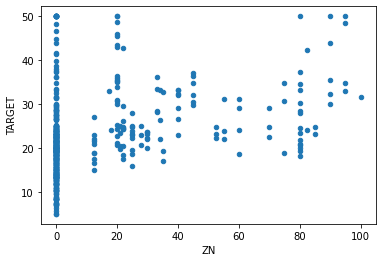

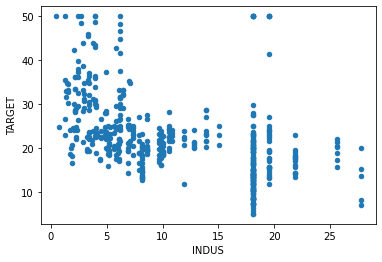

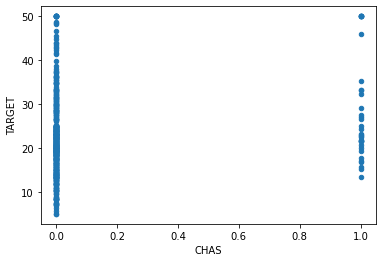

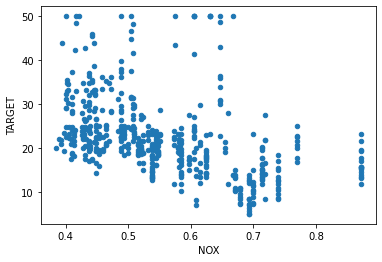

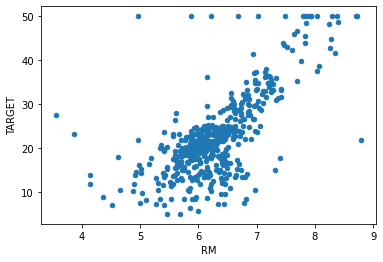

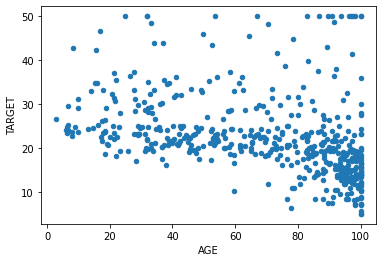

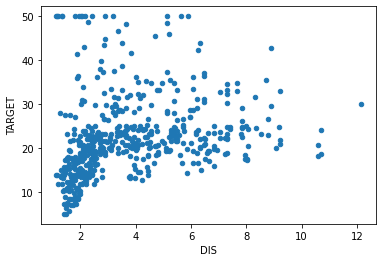

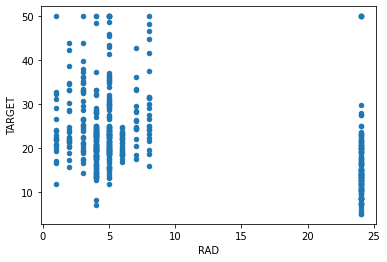

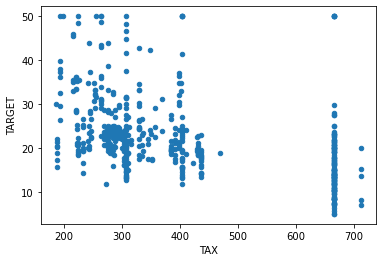

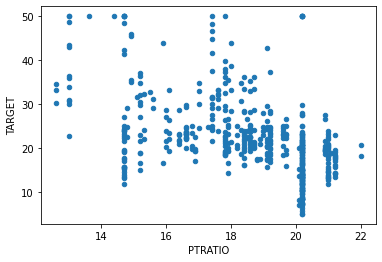

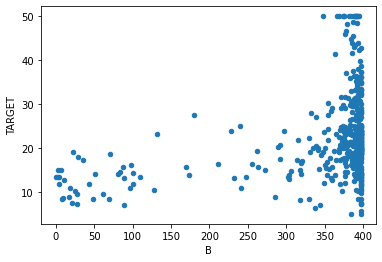

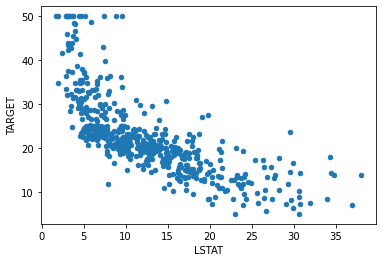

In [42]:
# Checking relation of various features on Target.
boston_df.plot(kind="scatter", x="CRIM", y="TARGET")
boston_df.plot(kind="scatter", x="ZN", y="TARGET")
boston_df.plot(kind="scatter", x="INDUS", y="TARGET")
boston_df.plot(kind="scatter", x="CHAS", y="TARGET")
boston_df.plot(kind="scatter", x="NOX", y="TARGET")
boston_df.plot(kind="scatter", x="RM", y="TARGET")
boston_df.plot(kind="scatter", x="AGE", y="TARGET")
boston_df.plot(kind="scatter", x="DIS", y="TARGET")
boston_df.plot(kind="scatter", x="RAD", y="TARGET")
boston_df.plot(kind="scatter", x="TAX", y="TARGET")
boston_df.plot(kind="scatter", x="PTRATIO", y="TARGET")
boston_df.plot(kind="scatter", x="B", y="TARGET")
boston_df.plot(kind="scatter", x="LSTAT", y="TARGET")

# Single Feature Prediction for understanding

In [51]:
x_features = boston_df[["CRIM"]]
y_target = boston_df.TARGET

In [52]:
from sklearn.linear_model import LinearRegression

lina = LinearRegression()
lina.fit(x_features, y_target)

LinearRegression()

In [85]:
print(lina.intercept_)

# Higher Coef val higher dependency.
print(lina.coef_)

24.03310617412388
[-0.41519028]


### From above we got that CRIM is inversaly proportional to Target price. Increase in CRIM Decrease Target.

In [76]:
# experiment to check Target for 2 CRIM rates. Low Crime area must have High Target and High Crime must have Low Target.

# From above fit calculations
inter = 24.03310617412388
coef = -0.41519028

# Case 1
CRIM_1 = 2
print("Case 1 Low CRIM Target: ", inter+coef*CRIM_1)

# Case 2
CRIM_2 = 50
print("Case 2 High CRIM Target: ", inter+coef*CRIM_2)


Case 1 Low CRIM Target:  23.202725614123878
Case 2 High CRIM Target:  3.273592174123877


In [77]:
x_case_1 = pd.DataFrame({'CRIM': [CRIM_1]})
print(x_case_1.head())

x_case_2 = pd.DataFrame({'CRIM': [CRIM_2]})
print(x_case_2.head())

   CRIM
0     2
   CRIM
0    50


In [83]:
#Pridict to match Calculated values above

print("Case 1 Low CRIM High Target: ", lina.predict(x_case_1)[0])
print("Case 2 High CRIM Low Target: ", lina.predict(x_case_2)[0])

Case 1 Low CRIM High Target:  23.202725618293698
Case 2 High CRIM Low Target:  3.273592278369339


### This fit method generates a equation internally which is useful to calculate end value or to predict the end value.

for example:  
  2 : 6
  
  3 : 9
  
  7 : 21

75 : ??

Fit method internaly create a equation like: 
x*3 = y

-> x: feature
-> y: target
-> 3: Coefficient

So, Target for 75 : ??

75 * 3 = 225


In [97]:
#Prof for above explaination

lina_dummy = LinearRegression()

val_df = pd.DataFrame({'x':[2,3,7], 'y': [6,9,21]})
print(val_df.head())
x_feat = val_df[['x']]
y_targ = val_df.y

print(x_feat)
print(y_targ)

   x   y
0  2   6
1  3   9
2  7  21
   x
0  2
1  3
2  7
0     6
1     9
2    21
Name: y, dtype: int64


In [100]:
lina_dummy.fit(x_feat,y_targ)

val_predict_df = pd.DataFrame({'x':[75]})

lina_dummy.predict(val_predict_df)[0]

225.00000000000006